In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

C:\Users\HP\AppData\Local\Temp\ipykernel_5484\2630575299.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('zomato.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [3]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
df['Date']= pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [5]:
df['Year']=df['Date'].dt.year
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290,2021
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854,2021
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900,2021
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731,2021
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089,2021


In [6]:
df['Year'].value_counts()

Year
2022    248
2023    245
2021    111
2024     27
Name: count, dtype: int64

<Axes: xlabel='Year', ylabel='High'>

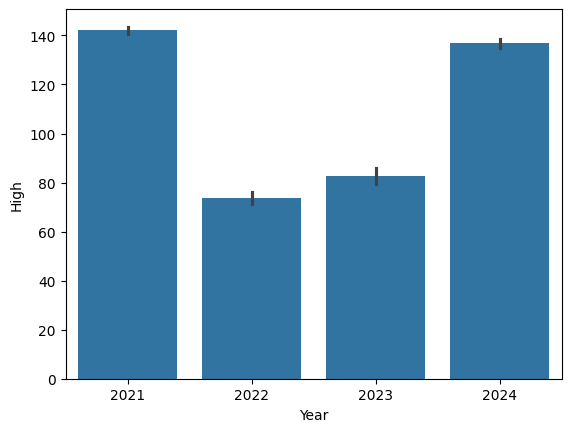

In [7]:
sns.barplot(df,x='Year',y='High')

<Axes: xlabel='Date', ylabel='High'>

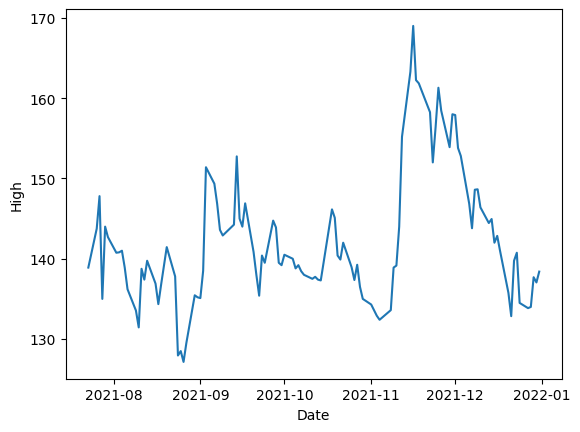

In [8]:
sns.lineplot(df[df['Year']==2021],x='Date',y='High')

In [11]:
fig=px.line(df[df['Year']==2021],x='Date',y='High')
fig.show()

In [13]:
df_melted= df.melt(id_vars=['Date'], value_vars=['High', 'Open', 'Close'], 
                    var_name='Type', value_name='Value')

In [16]:
fig1 = px.line(df_melted, x='Date', y='Value', color='Type', 
              title='High, Open, Close Line Plot')
fig1.show()